Prediction for number of reverse vending machines


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
total_waste=pd.read_csv("final dataset 1.csv")
total_waste

,Sr.no,state,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,Andaman & Nicobar,2675.00,2555.00,2123.000,2737.00,1583.00,567.0000,983.000,1850.000,387.00
1,2,Andhra Pradesh,28888.00,243820.00,243820.000,128480.00,128480.00,82863.0000,74588.000,66314.000,46222.00
2,3,Arunachal Pradesh,453.00,673.00,863.000,1273.00,1454.00,3836.0000,6000.000,3787.370,2715.00
3,4,Assam,1226.00,1116.00,781.000,1363.00,24010.00,24030.0000,28153.000,32277.870,4971.00
4,5,Bihar,1527.00,1673.00,1723.000,1893.00,2314.00,2280.0000,2280.000,68903.328,41365.00
5,6,Chandigarh,5548.00,4964.00,4818.000,8992.00,13167.00,21516.7500,12775.000,11715.400,6746.00
6,7,Chhattisgarh,4678.00,5840.00,6123.000,6345.00,6897.00,7300.0000,6650.000,6000.000,32850.00
7,8,Daman,1274.00,1347.00,14736.000,1573.00,1637.00,1733.0000,1836.000,1947.700,1948.00
8,9,Delhi,261234.00,251850.00,23456.000,24567.00,128649.00,232732.0000,228771.000,224810.000,230525.00
9,10,Goa,415.00,1642.50,117.730,104.00,106.00,28273.0000,26242.000,32580.520,26068.00


In [ ]:
df1=pd.DataFrame(total_waste)

In [ ]:
#state wise average for machines quantity prediction
df1['Mean'] = df1.mean(axis=1)
df1

<ipython-input-238-610f5af04074>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1['Mean'] = df1.mean(axis=1)


,Sr.no,state,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean
0,1,Andaman & Nicobar,2675.00,2555.00,2123.000,2737.00,1583.00,567.0000,983.000,1850.000,387.00,1546.10000
1,2,Andhra Pradesh,28888.00,243820.00,243820.000,128480.00,128480.00,82863.0000,74588.000,66314.000,46222.00,104347.70000
2,3,Arunachal Pradesh,453.00,673.00,863.000,1273.00,1454.00,3836.0000,6000.000,3787.370,2715.00,2105.73700
3,4,Assam,1226.00,1116.00,781.000,1363.00,24010.00,24030.0000,28153.000,32277.870,4971.00,11793.18700
4,5,Bihar,1527.00,1673.00,1723.000,1893.00,2314.00,2280.0000,2280.000,68903.328,41365.00,12396.33280
5,6,Chandigarh,5548.00,4964.00,4818.000,8992.00,13167.00,21516.7500,12775.000,11715.400,6746.00,9024.81500
6,7,Chhattisgarh,4678.00,5840.00,6123.000,6345.00,6897.00,7300.0000,6650.000,6000.000,32850.00,8269.00000
7,8,Daman,1274.00,1347.00,14736.000,1573.00,1637.00,1733.0000,1836.000,1947.700,1948.00,2803.97000
8,9,Delhi,261234.00,251850.00,23456.000,24567.00,128649.00,232732.0000,228771.000,224810.000,230525.00,160660.30000
9,10,Goa,415.00,1642.50,117.730,104.00,106.00,28273.0000,26242.000,32580.520,26068.00,11555.87500


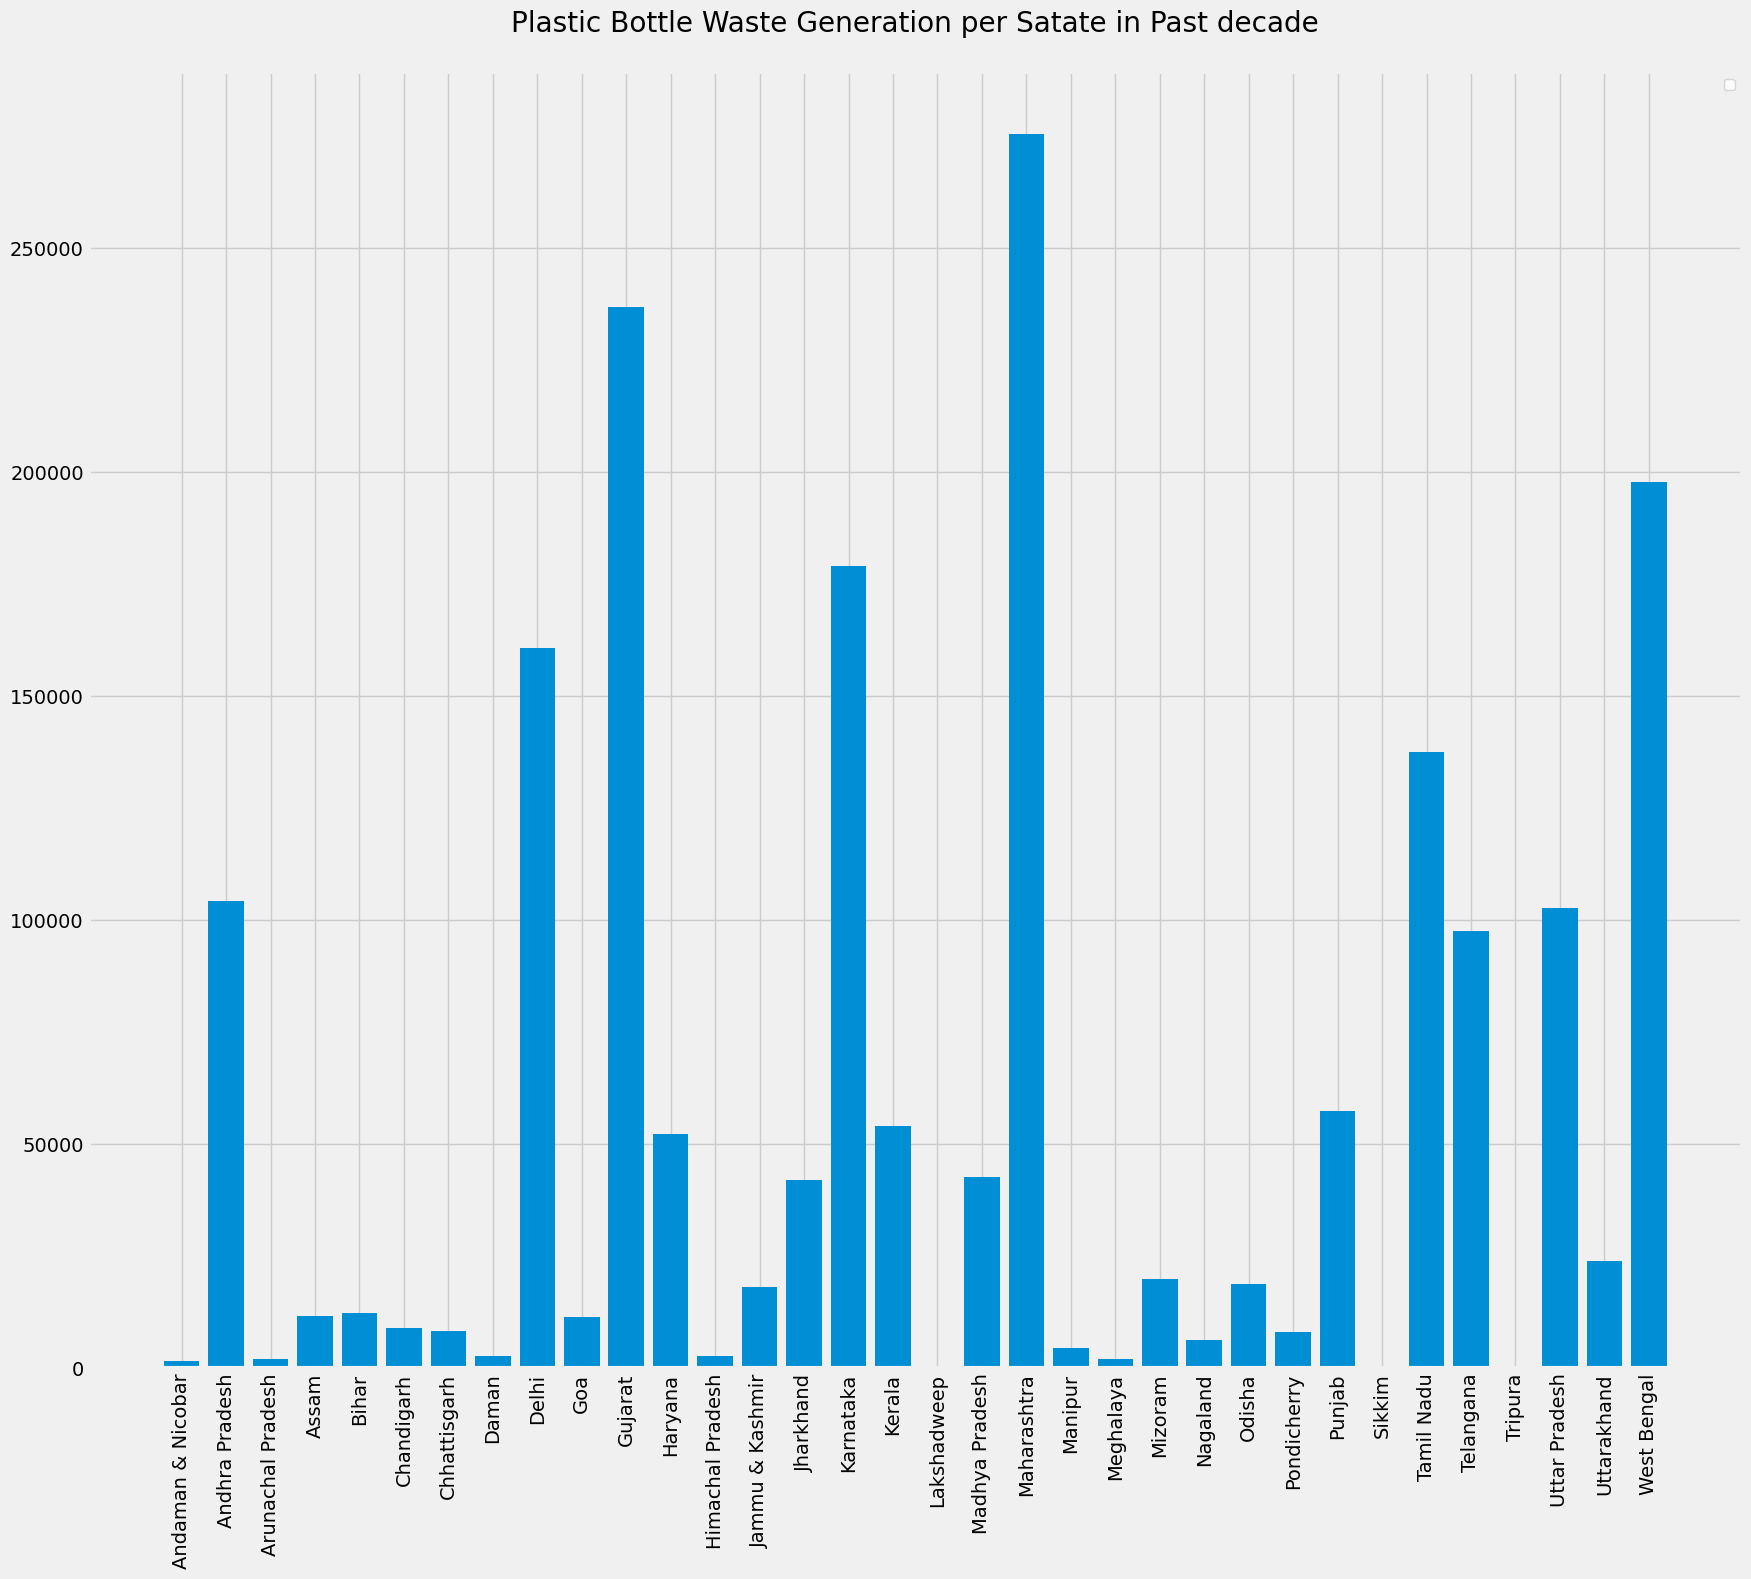

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(19,16))
plt.title("Plastic Bottle Waste Generation per Satate in Past decade\n")
plt.bar(x=df1['state'],
 
        height=df1['Mean'])

plt.xticks(rotation=90)
plt.rcdefaults()
plt.legend()


In [ ]:
x = ['2011','2012','2013','2014','2015','2016','2017','2019']
y = df1['2019']

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 2900x2600 with 0 Axes>

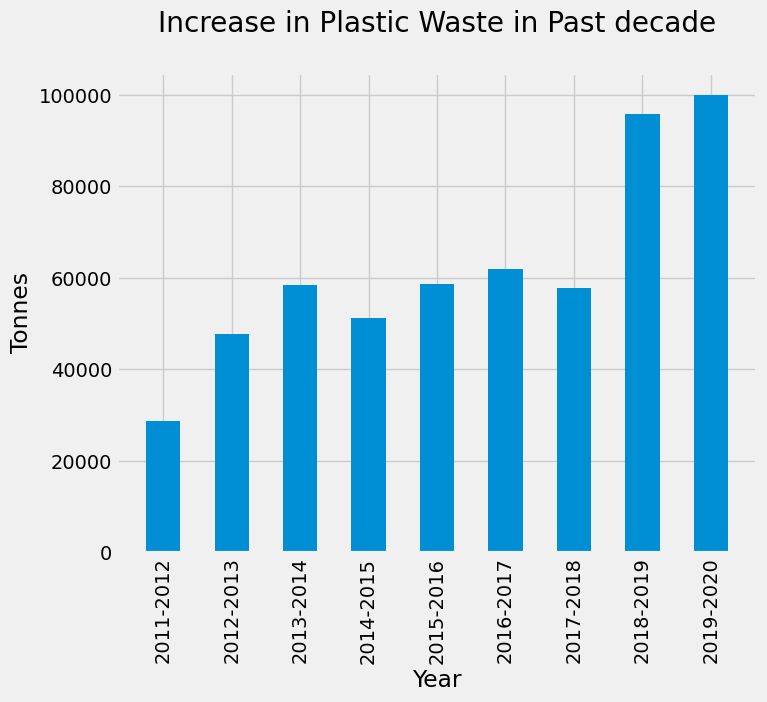

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(29,26))
y=mean_year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Years = ['2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020']
plt.title("Increase in Plastic Waste in Past decade\n")
ax.bar(Years,y,width=0.5)
plt.xlabel("Year")
plt.ylabel("Tonnes")

plt.xticks(rotation=90)



In [ ]:
#here 1.91625 tonnes is the calculation for each machine capacity for the year
df1['Number of reverse vending machines']=df1["Mean"]//1.91625
df1

,Sr.no,state,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean,Number of reverse vending machines
0,1,Andaman & Nicobar,2675.00,2555.00,2123.000,2737.00,1583.00,567.0000,983.000,1850.000,387.00,1546.10000,806.0
1,2,Andhra Pradesh,28888.00,243820.00,243820.000,128480.00,128480.00,82863.0000,74588.000,66314.000,46222.00,104347.70000,54454.0
2,3,Arunachal Pradesh,453.00,673.00,863.000,1273.00,1454.00,3836.0000,6000.000,3787.370,2715.00,2105.73700,1098.0
3,4,Assam,1226.00,1116.00,781.000,1363.00,24010.00,24030.0000,28153.000,32277.870,4971.00,11793.18700,6154.0
4,5,Bihar,1527.00,1673.00,1723.000,1893.00,2314.00,2280.0000,2280.000,68903.328,41365.00,12396.33280,6469.0
5,6,Chandigarh,5548.00,4964.00,4818.000,8992.00,13167.00,21516.7500,12775.000,11715.400,6746.00,9024.81500,4709.0
6,7,Chhattisgarh,4678.00,5840.00,6123.000,6345.00,6897.00,7300.0000,6650.000,6000.000,32850.00,8269.00000,4315.0
7,8,Daman,1274.00,1347.00,14736.000,1573.00,1637.00,1733.0000,1836.000,1947.700,1948.00,2803.97000,1463.0
8,9,Delhi,261234.00,251850.00,23456.000,24567.00,128649.00,232732.0000,228771.000,224810.000,230525.00,160660.30000,83840.0
9,10,Goa,415.00,1642.50,117.730,104.00,106.00,28273.0000,26242.000,32580.520,26068.00,11555.87500,6030.0


In [ ]:
from numpy.lib.arraysetops import setdiff1d
m1=df1['2011'].mean()
m2=df1['2012'].mean()
m3=df1['2013'].mean()
m4=df1['2014'].mean()
m5=df1['2015'].mean()
m6=df1['2016'].mean()
m7=df1['2017'].mean()
m8=df1['2018'].mean()
m9=df1['2019'].mean()
sum_m=df1['Number of reverse vending machines'].sum()
mean_year=[m1,m2,m3,m4,m5,m6,m7,m8,m9]
mean_year
sum_m


994260.0

In [ ]:
x= df1.iloc[:,2:11]  
y= df1.iloc[:,-2] 

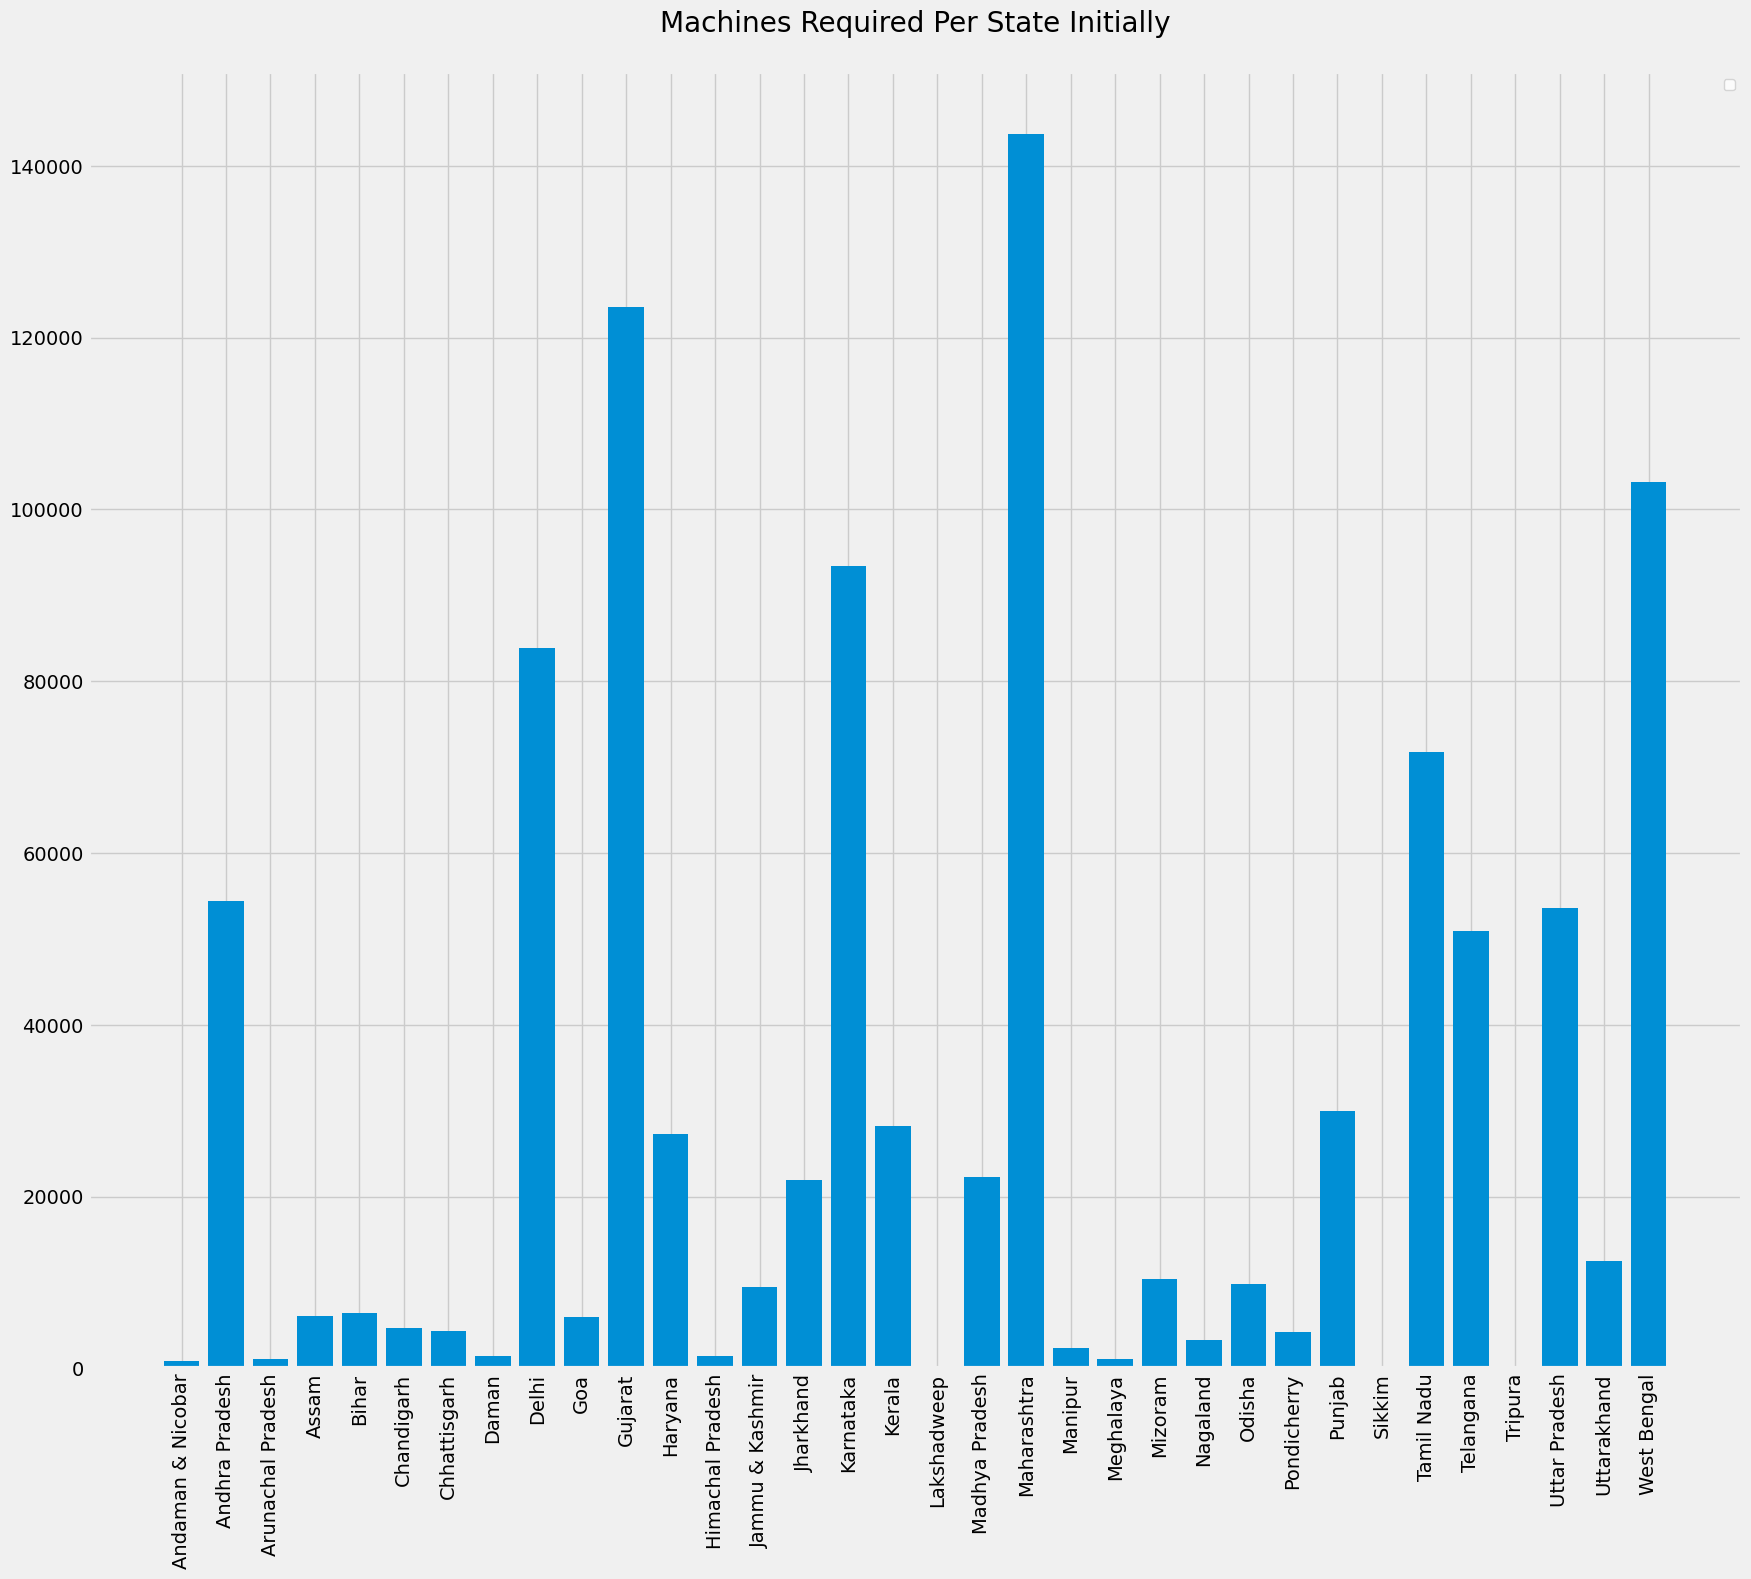

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(19,16))
plt.title("Machines Required Per State Initially\n")
plt.bar(x=df1['state'],
 
        height=df1['Number of reverse vending machines'])

plt.xticks(rotation=90)
plt.rcdefaults()
plt.legend()

In [ ]:
df2=pd.read_csv("rate.csv")
df2

,Year,PlasticProductionWaste,MachineCapacity,Recycle
0,2020,3419480,1755140,-1664340
1,2021,3522046,1807794,-1714252
2,2022,3627726,1898184,-1729542
3,2023,3736558,2031057,-1705501
4,2024,3848654,2213852,-1634802
5,2025,3964114,2634483,-1329631
6,2026,4083037,3424829,-658208
7,2027,4205529,3546902,-658627
8,2028,4331694,3972530,-359164
9,2029,4461645,4319644,-142001


Plastic Waste Generation is Increasing by 2% to 7% For first decade.
Machine Numbers Increasing by 1%-2% per Year and Machine Recycling Capacity Increasing by 3%-4% per Year respectively.

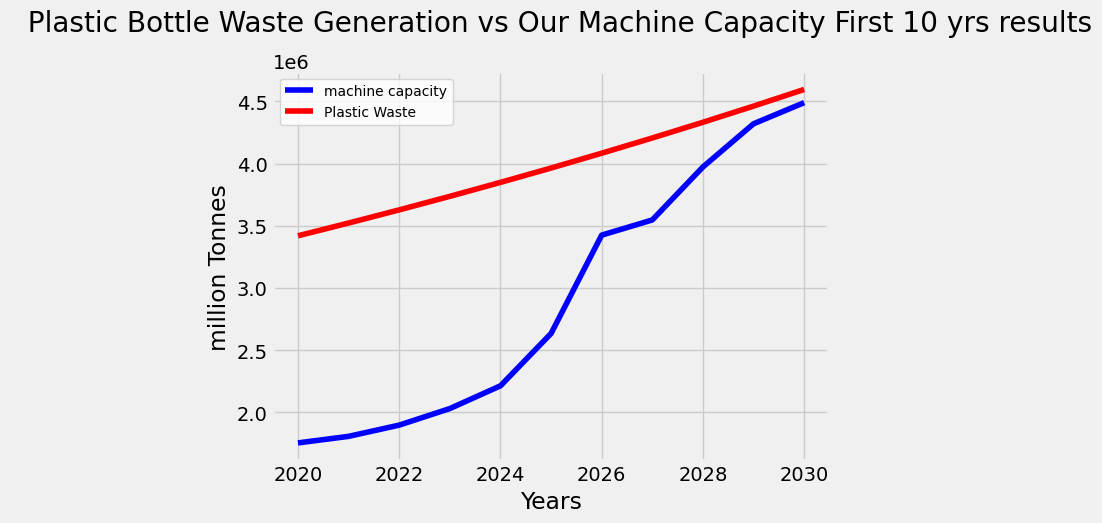

In [ ]:
plt.style.use('fivethirtyeight')

x = df2['Year']
y = df2['PlasticProductionWaste']
plt.plot(x,df2['MachineCapacity'],label="machine capacity",color='blue')
plt.plot(x, y,label="Plastic Waste",color='red')
plt.title("  Plastic Bottle Waste Generation vs Our Machine Capacity First 10 yrs results\n")

plt.rcdefaults()
plt.legend()

plt.xlabel("Years")
plt.ylabel("million Tonnes")
plt.savefig("plot.png")
plt.show()


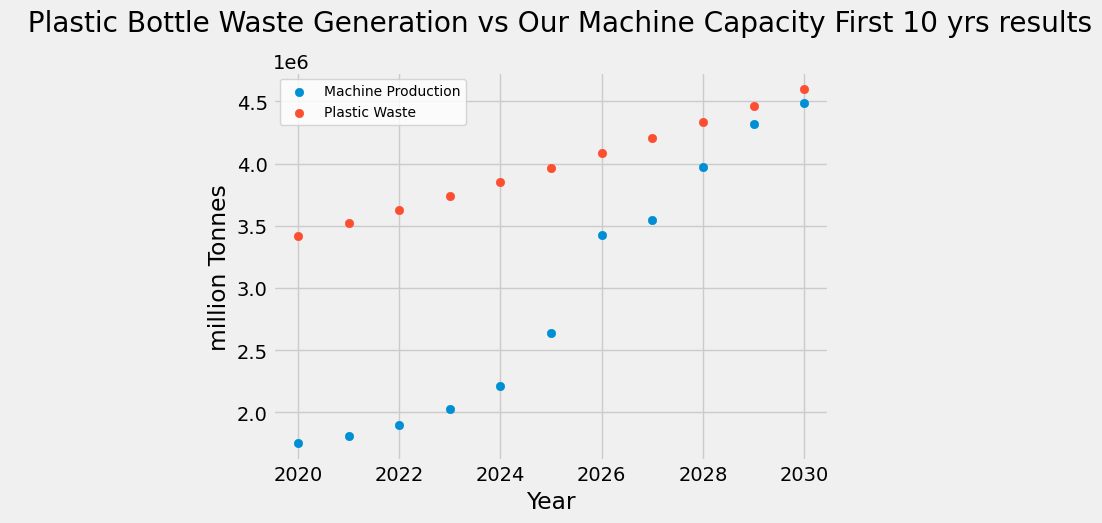

In [ ]:
plt.style.use('fivethirtyeight')

plt.title("  Plastic Bottle Waste Generation vs Our Machine Capacity First 10 yrs results\n")
plt.scatter(df2['Year'],df2['MachineCapacity'],label='Machine Production')
plt.scatter(df2['Year'],df2['PlasticProductionWaste'],label='Plastic Waste')
plt.xlabel("Year")
plt.ylabel("million Tonnes")
plt.rcdefaults()
plt.legend()

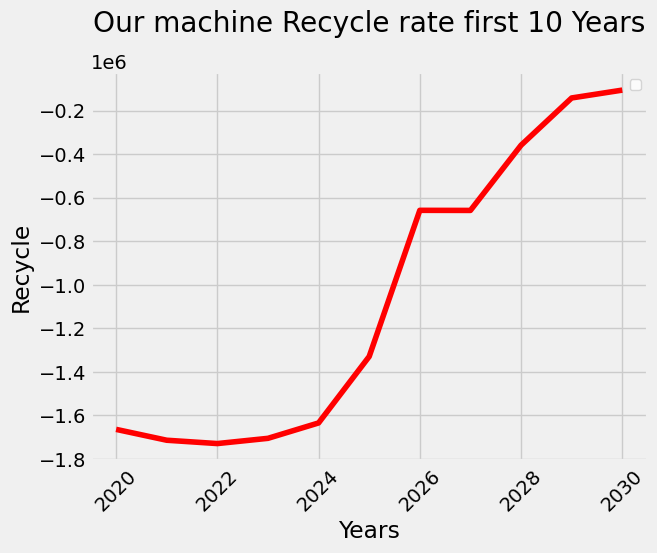

In [ ]:
x = df2['Year']
y = df2['Recycle']
  
plt.style.use('fivethirtyeight')


plt.plot(x, y,color='red')
plt.title("Our machine Recycle rate first 10 Years\n")
plt.xlabel("Years")
plt.ylabel("Recycle")

plt.rcdefaults()
plt.legend()
plt.xticks(rotation=45)
plt.show()

Recycling Rate is negative initally since machine capacity is less then total Plastic Bottle waste generation.
Recycling Rate will increase down the decades.

In [ ]:
df3=pd.read_csv("rate1.csv")
df3

,Year,PlasticProductionWaste,MachineCapacity,Recycle
0,2020,3419480,1755140,-1664340
1,2021,3522046,1807794,-1714252
2,2022,3627726,1898184,-1729542
3,2023,3736558,2031057,-1705501
4,2024,3848654,2213852,-1634802
5,2025,3964114,2634483,-1329631
6,2026,4083037,3424829,-658208
7,2027,4205529,3546902,-658627
8,2028,4331694,3972530,-359164
9,2029,4461645,4319644,-142001


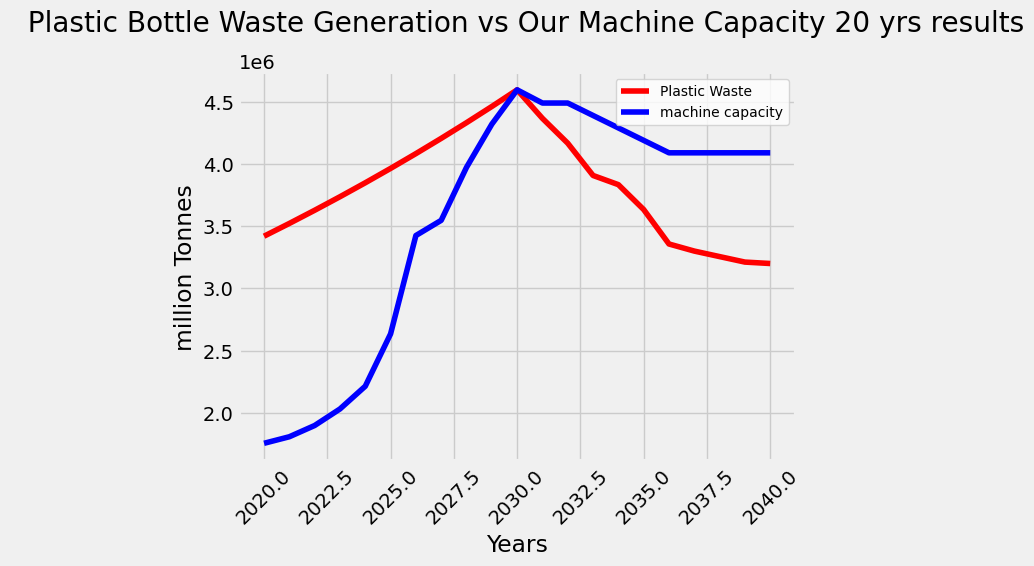

In [ ]:
x = df3['Year']
y = df3['PlasticProductionWaste']
  
plt.style.use('fivethirtyeight')


plt.plot(x, y,label="Plastic Waste",color='red')
plt.title("  Plastic Bottle Waste Generation vs Our Machine Capacity 20 yrs results\n")
plt.plot(x,df3['MachineCapacity'],label="machine capacity",color='blue')
plt.xlabel("Years")
plt.ylabel("million Tonnes")

plt.rcdefaults()
plt.legend()
plt.xticks(rotation=45)
plt.show()

Here Machine Recycling Capacity has Surpassed Plastic Bottle Waste Generation.

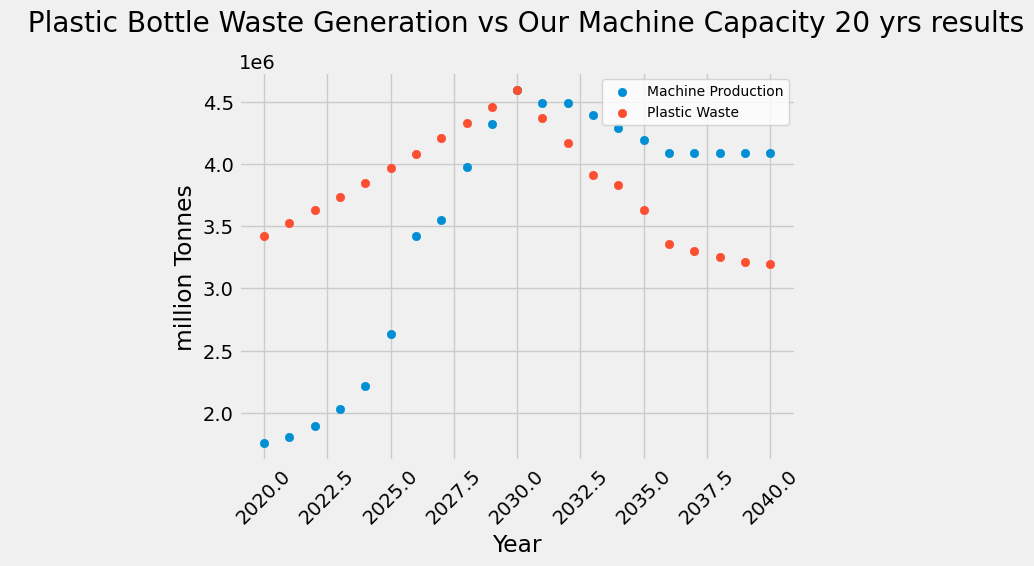

In [ ]:
plt.style.use('fivethirtyeight')


plt.scatter(df3['Year'],df3['MachineCapacity'],label='Machine Production')
plt.title("  Plastic Bottle Waste Generation vs Our Machine Capacity 20 yrs results\n")
plt.scatter(df3['Year'],df3['PlasticProductionWaste'],label='Plastic Waste')
plt.xlabel("Year")
plt.ylabel("million Tonnes")

plt.rcdefaults()
plt.xticks(rotation=45)
plt.legend()

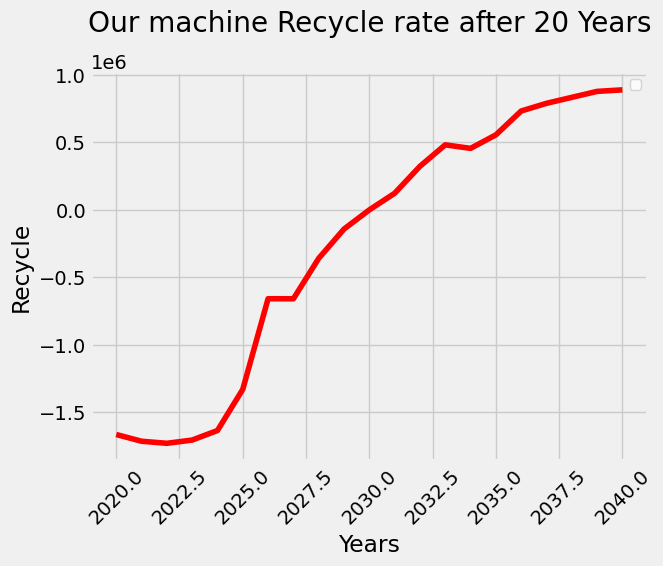

In [ ]:
x = df3['Year']
y = df3['Recycle']
  
plt.style.use('fivethirtyeight')


plt.plot(x, y,color='red')
plt.title("Our machine Recycle rate after 20 Years\n")
plt.xlabel("Years")
plt.ylabel("Recycle")

plt.rcdefaults()
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [3]:
df4=pd.read_csv("pollution.csv")
df4

,Year,xx,yy,zz,Recycled,TotalPlasticPollution,ww
0,2020,3419480,1755140,-1664340,1755140,3419480.000,10%
1,2021,3522046,1807794,-1714252,1807794,3761428.000,NaN
2,2022,3627726,1898184,-1729542,1898184,4137570.800,NaN
3,2023,3736558,2031057,-1705501,2031057,4551327.880,NaN
4,2024,3848654,2213852,-1634802,2213852,5006460.668,NaN
5,2025,3964114,2634483,-1329631,2634483,5507106.735,NaN
6,2026,4083037,3424829,-658208,3424829,6057817.408,NaN
7,2027,4205529,3546902,-658627,3546902,6663599.149,NaN
8,2028,4331694,3972530,-359164,3972530,6663599.149,NaN
9,2029,4461645,4319644,-142001,4319644,7329959.064,NaN


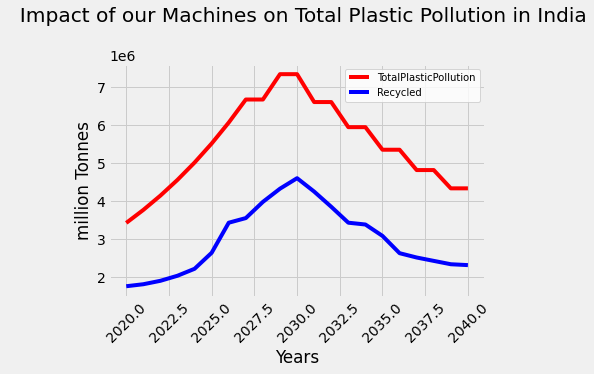

In [4]:
x = df4['Year']
y = df4['TotalPlasticPollution']
  
plt.style.use('fivethirtyeight')


plt.plot(x, y,label="TotalPlasticPollution",color='red')
plt.title("  Impact of our Machines on Total Plastic Pollution in India\n")
plt.plot(x,df4['Recycled'],label="Recycled",color='blue')
plt.xlabel("Years")
plt.ylabel("million Tonnes")

plt.rcdefaults()
plt.legend()
plt.xticks(rotation=45)
plt.show()

As the recycling rate increases the total plastic pollution also decreases gradually.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sn


In [20]:
X = df4[['xx', 'yy']]
y = df4['Recycled']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print (X_test)

         xx       yy
8   4331694  3972530
13  3907436  4389531
20  3199988  4089538
1   3522046  1807794
11  4366365  4489529
10  4595499  4595499


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print (y_pred)

[4319644 3377738 2333345 1755140 3843740 3843740]


<Axes: xlabel='Predicted', ylabel='Actual'>

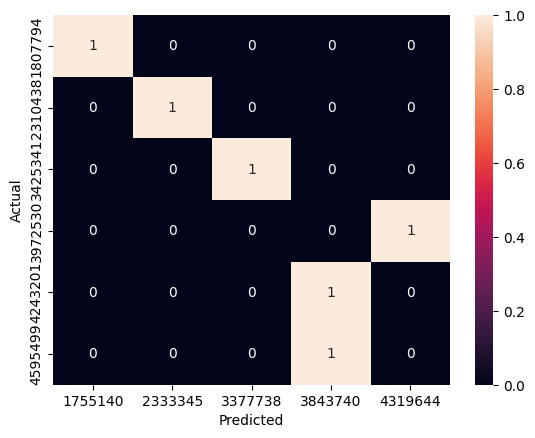

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [24]:
import statsmodels.api as sm
x=sm.add_constant(X)
model=sm.OLS(y,X)
fitted_model=model.fit()
print(fitted_model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Recycled   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              409.2
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                    2.40e-16
Time:                        07:28:49   Log-Likelihood:                         -303.89
No. Observations:                  21   AIC:                                      611.8
Df Residuals:                      19   BIC:                                      613.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------